# 3.  Codificación de variables

Conjunto de datos: titanic (incluido en seaborn)

Este conjunto de datos es excelente para trabajar con variables categóricas.

In [38]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [39]:
# Cargar el conjunto de datos
data = sns.load_dataset('titanic')

In [40]:
# Visualizar las primeras filas
print("Conjunto de datos Titanic:")
data.head()

Conjunto de datos Titanic:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
# Seleccionar columnas categóricas
categorical_cols = ['sex', 'embarked', 'class']

In [42]:
# Codificar con LabelEncoder
label_encoder = LabelEncoder()
data['sex_label'] = label_encoder.fit_transform(data['sex'])

In [43]:
# Codificar con OneHotEncoder
onehot_encoder = pd.get_dummies(data['embarked'], prefix='embarked')

In [44]:
# Combinar con el conjunto original
data = pd.concat([data, onehot_encoder], axis=1)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre LabelEncoder y OneHotEncoder?

In [45]:
data.head()
#label encoder convierte categorias en numero enteros
#onehotencoder crea una columna por categoria


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_label,embarked_C,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,False,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,False,False,True


### 2. Crea una gráfica de barras comparando las frecuencias de 'sex' antes y después de la codificación con LabelEncoder.

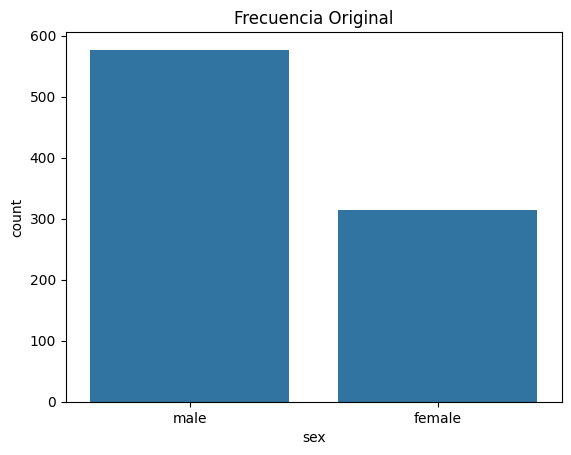

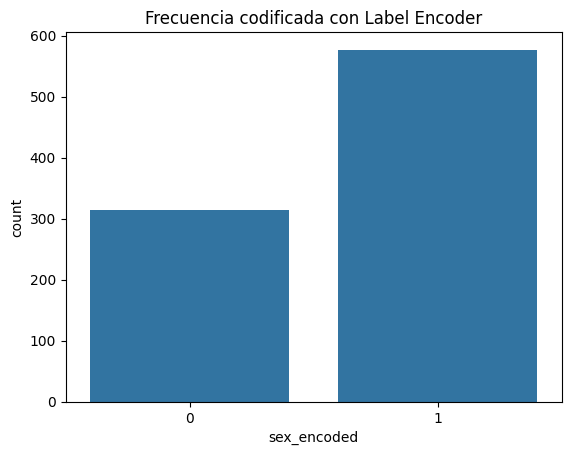

In [48]:
#Antes
sns.countplot(x='sex', data=data)
plt.title('Frecuencia Original')
plt.show()
#usando Label Encoder
data['sex_encoded']=label_encoder.fit_transform(data['sex'])
sns.countplot(x='sex_encoded', data=data)
plt.title('Frecuencia codificada con Label Encoder')
plt.show()



### 3. Utiliza OneHotEncoder para codificar la columna 'class'. ¿Qué ventajas tiene este enfoque frente a LabelEncoder?

In [50]:
# Codificar con OneHotEncoder
class_encoder= pd.get_dummies(data['class'], prefix='class')
data= pd.concat([data, class_encoder], axis=1)
#Ventaja evita que el modelo interprete una orden inexistente entre clases
data.head(
    
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embarked_C,embarked_Q,embarked_S,sex_encoded,class_First,class_Second,class_Third,class_First,class_Second,class_Third
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,False,False,True,1,False,False,True,False,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,True,False,False,0,True,False,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,False,False,True,0,False,False,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,False,False,True,0,True,False,False,True,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,False,False,True,1,False,False,True,False,False,True


### 4. Si quisieras aplicar un modelo de aprendizaje automático, ¿qué tipo de codificación elegirías para las variables categóricas? Explica tu respuesta.

In [ ]:
#modelos basados en arboles de desicion label encoder es mejor opcion
#modelos basados en redes neuronales o lineales es preferible onehotencoder para evitar relaciones numericas falsas